### Project: Adidas Sales EDA
# Date: 2025-09-13

**Contents**
1. Exploratory Data Analysis (EDA)  
2. Data Cleaning  
3. Build the Dashboard












### Phase 1 - Exploratory Data Analysis (EDA)

In [ ]:
# Import pandas library
import pandas as pd
import matplotlib.pyplot as plt


# Read the Excel file into a DataFrame
df = pd.read_csv("/content/data_sales(1).csv")

# Display the first 5 rows of the dataset
df.head()


,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Sales Method
0,Walmart,1128299,6/17/2021,Southeast,Florida,Orlando,Women's Apparel,$103.00,218,"2,245","$1,257",Online
1,West Gear,1128299,7/16/2021,South,Louisiana,New Orleans,Women's Apparel,$103.00,163,"1,679",$806,Online
2,Sports Direct,1197831,8/25/2021,South,Alabama,Birmingham,Men's Street Footwear,$10.00,700,"7,000","$3,150",Outlet
3,Sports Direct,1197831,8/27/2021,South,Alabama,Birmingham,Women's Street Footwear,$15.00,575,"8,625","$3,881",Outlet
4,Sports Direct,1197831,8/21/2021,South,Alabama,Birmingham,Women's Street Footwear,$15.00,475,"7,125","$3,206",Outlet


In [ ]:
# Display a random sample of 10 rows
df.sample(10)

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Sales Method
105,Foot Locker,1185732,3/16/2020,Northeast,New York,New York,Men's Street Footwear,$58.00,325,"1,885","$1,150",Online
6124,Foot Locker,1185732,06/10/2021,Midwest,Illinois,Chicago,Men's Apparel,$50.00,44,220,$103,Online
6939,West Gear,1128299,08/01/2020,West,Washington,Seattle,Men's Athletic Footwear,$85.00,750,"63,750","$15,938",In-store
458,Walmart,1185732,4/22/2020,Northeast,New York,New York,Women's Athletic Footwear,$47.00,252,"1,184",$545,Online
5629,West Gear,1128299,9/25/2021,West,Oregon,Portland,Women's Athletic Footwear,$38.00,62,236,$99,Outlet
3713,Foot Locker,1185732,10/28/2021,Northeast,Pennsylvania,Philadelphia,Men's Street Footwear,$42.00,119,500,$335,Online
7858,Sports Direct,1185732,08/09/2021,Midwest,North Dakota,Fargo,Men's Street Footwear,$50.00,525,"26,250","$9,188",In-store
955,West Gear,1197831,05/05/2021,West,Idaho,Boise,Women's Apparel,$42.00,218,916,$577,Online
5379,Amazon,1185732,1/14/2021,Northeast,Massachusetts,Boston,Men's Apparel,$37.00,70,259,$106,Outlet
4348,West Gear,1128299,3/23/2021,West,Oregon,Portland,Men's Apparel,$55.00,100,"5,500","$2,200",In-store


In [ ]:
# Check dataset shape (rows, columns)
df.shape

(9641, 12)

In [ ]:
# Check data types of each column
df.dtypes

,0
Retailer,object
Retailer ID,int64
Invoice Date,object
Region,object
State,object
City,object
Product,object
Price per Unit,object
Units Sold,object
Total Sales,object


In [ ]:
# Check for missing values in each column
df.isnull().sum()

,0
Retailer,0
Retailer ID,0
Invoice Date,0
Region,0
State,0
City,0
Product,0
Price per Unit,2
Units Sold,0
Total Sales,0


In [ ]:
# Check for duplicate rows in the dataset
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
9636,False
9637,False
9638,False
9639,False


In [ ]:
# Check for duplicate rows
df.describe()

,Retailer ID
count,9.641000e+03
mean,1.173851e+06
std,2.635869e+04
min,1.128299e+06
25%,1.185732e+06
50%,1.185732e+06
75%,1.185732e+06
max,1.197831e+06



# Phase 2 - Data Cleaning

In [ ]:
# Data Cleaning: Remove rows with missing values in "Price per Unit"
df.dropna(subset = "Price per Unit", inplace = True)

In [ ]:
# Verify again if there are missing values
df.isna().sum()

,0
Retailer,0
Retailer ID,0
Invoice Date,0
Region,0
State,0
City,0
Product,0
Price per Unit,0
Units Sold,0
Total Sales,0


In [ ]:
# Convert Invoice Date to datetime
df['Invoice Date'] = pd.to_datetime(df['Invoice Date'])

# Create Month column as datetime (start of month)
df['Month'] = df['Invoice Date'].dt.to_period('M').dt.to_timestamp()

# Create Year column as datetime (start of year)
df['Year'] = df['Invoice Date'].dt.to_period('Y').dt.to_timestamp()


# Clean money columns: remove $ and , then convert to float
money_cols = ["Price per Unit", "Total Sales", "Operating Profit"]
for col in money_cols:
    df[col] = df[col].replace(r'[\$,]', '', regex=True).astype(float)

# Clean Units Sold: remove commas and convert to integer
df["Units Sold"] = df["Units Sold"].replace(',', '', regex=True).astype(int)


# Convert Retailer ID to integer
df["Retailer ID"] = df["Retailer ID"].astype(int)

In [ ]:
# Drop rows where "Units Sold" is 0
df = df.drop(df[df["Units Sold"] == 0].index)

# Print the new shape of the dataframe after dropping rows
print(df.shape)


(9635, 14)


In [ ]:
# Show column types
df.dtypes

,0
Retailer,object
Retailer ID,int64
Invoice Date,datetime64[ns]
Region,object
State,object
City,object
Product,object
Price per Unit,float64
Units Sold,int64
Total Sales,float64


In [ ]:
# Quick stats
df.describe()

,Retailer ID,Invoice Date,Price per Unit,Units Sold,Total Sales,Operating Profit,Month,Year
count,9.635000e+03,9635,9635.000000,9635.000000,9635.000000,9635.000000,9635,9635
mean,1.173842e+06,2021-05-10 18:44:47.950181632,45.217955,256.799273,9314.900571,3439.209549,2021-04-27 02:02:33.191489280,2020-11-12 17:33:21.577581824
min,1.128299e+06,2020-01-01 00:00:00,7.000000,6.000000,16.000000,8.000000,2020-01-01 00:00:00,2020-01-01 00:00:00
25%,1.185732e+06,2021-02-17 00:00:00,35.000000,106.000000,426.000000,192.000000,2021-02-01 00:00:00,2021-01-01 00:00:00
50%,1.185732e+06,2021-06-04 00:00:00,45.000000,176.000000,957.000000,437.000000,2021-06-01 00:00:00,2021-01-01 00:00:00
75%,1.185732e+06,2021-09-16 00:00:00,55.000000,350.000000,15000.000000,5200.000000,2021-09-01 00:00:00,2021-01-01 00:00:00
max,1.197831e+06,2021-12-31 00:00:00,110.000000,1275.000000,82500.000000,39000.000000,2021-12-01 00:00:00,2021-01-01 00:00:00
std,2.636437e+04,NaN,14.705179,214.020187,14179.287701,5417.362413,NaN,NaN


In [ ]:
# Show first 5 records
df.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Sales Method,Month,Year
0,Walmart,1128299,2021-06-17,Southeast,Florida,Orlando,Women's Apparel,103.0,218,2245.0,1257.0,Online,2021-06-01,2021-01-01
1,West Gear,1128299,2021-07-16,South,Louisiana,New Orleans,Women's Apparel,103.0,163,1679.0,806.0,Online,2021-07-01,2021-01-01
2,Sports Direct,1197831,2021-08-25,South,Alabama,Birmingham,Men's Street Footwear,10.0,700,7000.0,3150.0,Outlet,2021-08-01,2021-01-01
3,Sports Direct,1197831,2021-08-27,South,Alabama,Birmingham,Women's Street Footwear,15.0,575,8625.0,3881.0,Outlet,2021-08-01,2021-01-01
4,Sports Direct,1197831,2021-08-21,South,Alabama,Birmingham,Women's Street Footwear,15.0,475,7125.0,3206.0,Outlet,2021-08-01,2021-01-01


In [ ]:
df.shape

(9635, 14)

In [ ]:
df.describe()

,Retailer ID,Invoice Date,Price per Unit,Units Sold,Total Sales,Operating Profit,Month,Year
count,9.635000e+03,9635,9635.000000,9635.000000,9635.000000,9635.000000,9635,9635
mean,1.173842e+06,2021-05-10 18:44:47.950181632,45.217955,256.799273,9314.900571,3439.209549,2021-04-27 02:02:33.191489280,2020-11-12 17:33:21.577581824
min,1.128299e+06,2020-01-01 00:00:00,7.000000,6.000000,16.000000,8.000000,2020-01-01 00:00:00,2020-01-01 00:00:00
25%,1.185732e+06,2021-02-17 00:00:00,35.000000,106.000000,426.000000,192.000000,2021-02-01 00:00:00,2021-01-01 00:00:00
50%,1.185732e+06,2021-06-04 00:00:00,45.000000,176.000000,957.000000,437.000000,2021-06-01 00:00:00,2021-01-01 00:00:00
75%,1.185732e+06,2021-09-16 00:00:00,55.000000,350.000000,15000.000000,5200.000000,2021-09-01 00:00:00,2021-01-01 00:00:00
max,1.197831e+06,2021-12-31 00:00:00,110.000000,1275.000000,82500.000000,39000.000000,2021-12-01 00:00:00,2021-01-01 00:00:00
std,2.636437e+04,NaN,14.705179,214.020187,14179.287701,5417.362413,NaN,NaN


In [ ]:
df.dtypes

,0
Retailer,object
Retailer ID,int64
Invoice Date,datetime64[ns]
Region,object
State,object
City,object
Product,object
Price per Unit,float64
Units Sold,int64
Total Sales,float64


Visualization


Region
West         26902628.0
Northeast    18581487.0
Southeast    16317146.0
South        14387736.0
Midwest      13560070.0
Name: Total Sales, dtype: float64


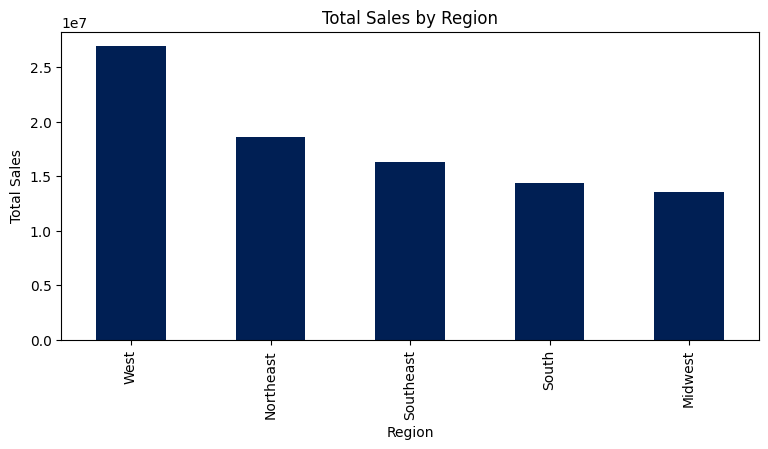

In [ ]:
# Calculate and plot total sales by region
region_sales = df.groupby("Region")["Total Sales"].sum().sort_values(ascending=False)
print(region_sales)

# Plot - barchart
region_sales.plot(
    kind="bar",
    figsize=(9,4),#(width,height)
    title="Total Sales by Region",
    color='#001F54',
)
plt.ylabel("Total Sales")
plt.xlabel("Region")
plt.show()

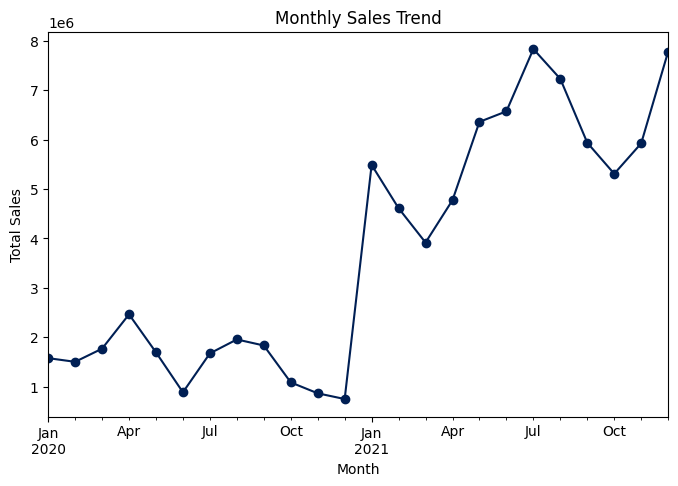

In [ ]:
# Calculate and plot monthly sales trend
monthly_sales = df.groupby("Month")["Total Sales"].sum()

# Plot - linechart
monthly_sales.plot(
    kind="line",
    marker="o",
    figsize=(8,5),#(width,height)
    title="Monthly Sales Trend",
    color='#001F54',

)
plt.ylabel("Total Sales")
plt.xlabel("Month")
plt.show()

In [ ]:
# Save cleaned data
df.to_csv("/content/cleaned_data_sales.csv", index=False)


### Phase 3 - Dashbored

In [ ]:
!pip install streamlit pandas plotly pyngrok


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 57.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 111.7 MB/s eta 0:00:00


In [ ]:
# Creating a Python file
%%writefile dashboard.py

# Import necessary libraries
import streamlit as st  # Streamlit library for dashboard UI
import pandas as pd      # Pandas for data manipulation
import matplotlib.pyplot as plt  # Matplotlib for plotting charts
from matplotlib.ticker import StrMethodFormatter  # For formatting y-axis numbers
import numpy as np       # Numpy for numerical operations

# Page settings
st.set_page_config(
    page_title="Adidas Dashboard",  # Title of the web page
    layout="wide"                   # Wide layout to use full screen width
)

# Apply custom CSS styling for dark theme
st.markdown("""
<style>
body { background-color: #0A0A0A; color: #E0E1DD; }
.sidebar .sidebar-content { background-color: #0D1B2A; color: #E0E1DD; }
</style>
""", unsafe_allow_html=True)

# Load dataset
df = pd.read_csv("cleaned_data_sales.csv")

# Sidebar: Filters and dataset information
st.sidebar.header("Filters & Dataset Info")

# Show a brief description of the dataset
st.sidebar.markdown("Dataset Description")
st.sidebar.markdown("""
This dataset contains Adidas sales data including:
- Product, Units Sold
- Total Sales, Operating Profit
- Sales Method (Online / In-Store/Outlet)
- Region
""")
st.sidebar.markdown("Filters")

# Sidebar filter options
regions = ["All"] + sorted(df["Region"].unique())
methods = ["All"] + sorted(df["Sales Method"].unique())
years = ["All"] + sorted(df["Year"].unique())

# Sidebar select boxes for filtering
selected_region = st.sidebar.selectbox("Select Region", regions)
selected_method = st.sidebar.selectbox("Select Sales Method", methods)
selected_year = st.sidebar.selectbox("Select Year", years)

# Apply filters without modifying the original dataframe
filtered_df = df.copy()
if selected_region != "All":
    filtered_df = filtered_df[filtered_df["Region"] == selected_region]
if selected_method != "All":
    filtered_df = filtered_df[filtered_df["Sales Method"] == selected_method]
if selected_year != "All":
    filtered_df = filtered_df[filtered_df["Year"] == selected_year]

# Page header: Logo and title
col_logo, col_title = st.columns([1, 4])
with col_logo:
    st.image("/content/adidas.png", width=120)  # Display logo
with col_title:
    st.title("Adidas Sales Dashboard")  # Dashboard title

# KPI Metrics
top_product_name = filtered_df.groupby("Product")["Units Sold"].sum().idxmax()  # Find top product
col1, col2, col3, col4 = st.columns(4)
col1.metric("Total Sales", f"${filtered_df['Total Sales'].sum():,.0f}")  # Total sales
col2.metric("Total Profit", f"${filtered_df['Operating Profit'].sum():,.0f}")  # Total profit
col3.metric("Total Units Sold", f"{filtered_df['Units Sold'].sum():,}")  # Total units sold
col4.markdown(f"""
Top Product:
<div style='font-size:20px; line-height:1.2; white-space: pre-wrap; word-wrap: break-word;'>{top_product_name}</div>
""", unsafe_allow_html=True)  # Display top product with text wrapping

# Define chart colors
chart_colors = ['#1E3A8A', '#2563EB', '#3B82F6', '#60A5FA', '#93C5FD', '#BFDBFE', '#E0F2FE']

# First row: Overview charts
row1_col1, row1_col2 = st.columns(2)

# Monthly Sales Line Chart
with row1_col1:
    # Title with bigger font
    st.markdown("""
    <span style='font-size:24px; font-weight:bold; color:#FFFFFF'>
    Monthly Sales (by Year & Month)
    </span>
    """, unsafe_allow_html=True)

    # Convert 'Invoice Date' column to datetime type
    filtered_df['Invoice Date'] = pd.to_datetime(filtered_df['Invoice Date'])
    # Create 'YearMonth' column for grouping (e.g., Jan 2020)
    filtered_df['YearMonth'] = filtered_df['Invoice Date'].dt.strftime('%b %Y')

    # Aggregate total sales per 'YearMonth'
    monthly_sales = filtered_df.groupby('YearMonth')['Total Sales'].sum().reset_index()
    # Convert 'YearMonth' to datetime for proper sorting
    monthly_sales['Date'] = pd.to_datetime(monthly_sales['YearMonth'])
    monthly_sales = monthly_sales.sort_values('Date')

    # Create the matplotlib figure and axis
    fig, ax = plt.subplots()
    # Set figure and axis backgrounds to transparent
    fig.patch.set_facecolor("none")
    ax.set_facecolor("none")

    # Plot line chart with marker points
    ax.plot(monthly_sales['YearMonth'], monthly_sales['Total Sales'], color=chart_colors[2], linewidth=4, marker='o')

    # Set axis labels with white color
    ax.set_xlabel("Month-Year", color="#FFFFFF")
    ax.set_ylabel("Total Sales ($)", color="#FFFFFF")

    # Format y-axis numbers with commas for readability
    ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

    # Customize tick labels
    plt.xticks(rotation=45, ha="right", fontsize=10, color="#FFFFFF")
    plt.yticks(fontsize=10, color="#FFFFFF")

    # Remove chart borders
    for spine in ax.spines.values():
        spine.set_visible(False)

    # Display the figure in Streamlit
    st.pyplot(fig)


# Profit by Region Bar Chart
with row1_col2:
    # Title with bigger font
    st.markdown("""
    <span style='font-size:24px; font-weight:bold; color:#FFFFFF'>
    Profit by Region
    </span>
    """, unsafe_allow_html=True)

    # Group the filtered data by 'Region' and sum the 'Operating Profit' for each region
    profit_region = filtered_df.groupby('Region')['Operating Profit'].sum()

    # Create a matplotlib figure and axis for the bar chart
    fig, ax = plt.subplots()
    fig.patch.set_facecolor("none")
    ax.set_facecolor("none")

    # Select bar colors from chart_colors
    bar_colors = chart_colors[:len(profit_region)]
    # Create the bar chart
    ax.bar(profit_region.index, profit_region.values, color=bar_colors, edgecolor='none')

    # Set axis labels and title
    ax.set_xlabel("Region", color="#FFFFFF")
    ax.set_ylabel("Profit ($)", color="#FFFFFF")

    # Format y-axis numbers with commas
    ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

    # Customize tick labels
    ax.tick_params(axis='x', colors="#FFFFFF", labelsize=12)
    ax.tick_params(axis='y', colors="#FFFFFF", labelsize=12)

    # Remove chart borders
    for spine in ax.spines.values():
        spine.set_visible(False)

    # Display the figure in Streamlit
    st.pyplot(fig)


# Second row: Detailed charts
row2_col1, row2_col2 = st.columns(2)

# Top Products by Units Sold
with row2_col1:
    # Title with bigger font
    st.markdown("""
    <span style='font-size:24px; font-weight:bold; color:#FFFFFF'>
    Top Products by Units Sold
    </span>
    """, unsafe_allow_html=True)

    # Group the filtered DataFrame by 'Product' and sum the 'Units Sold' for each product
    # Then sort descending and take the top 10
    top_products = filtered_df.groupby("Product")["Units Sold"].sum().sort_values(ascending=False).head(10)

    # Create a matplotlib figure and axis for the horizontal bar chart
    fig, ax = plt.subplots(figsize=(9, 10))
    fig.patch.set_facecolor("none")
    ax.set_facecolor("none")

    # Select bar colors
    bar_colors = chart_colors[:len(top_products)]
    # Draw horizontal bars (reversed for largest on top)
    ax.barh(top_products.index[::-1], top_products.values[::-1], color=bar_colors, edgecolor='none')

    # Set axis labels and customize font size
    ax.set_xlabel("Units Sold", color="#FFFFFF", fontsize=12)
    ax.set_ylabel("Product", color="#FFFFFF", fontsize=14)
    ax.tick_params(axis='x', colors="#FFFFFF", labelsize=12)
    ax.tick_params(axis='y', colors="#FFFFFF", labelsize=12)

    # Remove chart borders
    for spine in ax.spines.values():
        spine.set_visible(False)

    # Display the figure in Streamlit
    st.pyplot(fig)


# Profit by Sales Method Pie Chart
with row2_col2:
    # Title with bigger font
    st.markdown("""
    <span style='font-size:24px; font-weight:bold; color:#FFFFFF'>
    Profit by Sales Method
    </span>
    """, unsafe_allow_html=True)

    # Group the filtered data by 'Sales Method' and sum the 'Operating Profit'
    profit_method = filtered_df.groupby('Sales Method')['Operating Profit'].sum()

    # Create a matplotlib figure and axis for the pie chart
    fig, ax = plt.subplots()
    fig.patch.set_facecolor("none")
    ax.set_facecolor("none")

    # Select colors for each slice
    pie_colors = chart_colors[:len(profit_method)]

    # Draw pie chart with labels and percentages
    ax.pie(profit_method.values, labels=profit_method.index, autopct='%1.1f%%', startangle=90, colors=pie_colors,
           textprops={'color': "#FFFFFF"})
    ax.axis('equal')  # Keep the pie chart circular

    # Remove chart borders
    for spine in ax.spines.values():
        spine.set_visible(False)

    # Display the figure in Streamlit
    st.pyplot(fig)


# Summary statistics
st.markdown("""
<span style='font-size:22px; font-weight:bold; color:#FFFFFF'>
Summary Statistics
</span>
""", unsafe_allow_html=True)
st.write(filtered_df.describe())  # Show descriptive statistics

# Data table preview
st.markdown("""
<span style='font-size:22px; font-weight:bold; color:#FFFFFF'>
Data Preview
</span>
""", unsafe_allow_html=True)
st.dataframe(filtered_df.head(10))  # Show interactive table


Writing dashboard.py


In [ ]:
#Setup the ngrok authentication in Colab
# ngrok is a tool that creates a secure public URL for your local server or app.
!ngrok authtoken 32gDfAaQbAVzUSfEJgD63rpkFhd_2kqnr9YcvTaG77A18igbk


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
# Import the pyngrok library to manage ngrok tunnels in Python
from pyngrok import ngrok

# Kill any previous tunnels
ngrok.kill()


In [ ]:
# Start a new ngrok tunnel on port 8501 (default Streamlit port)
url = ngrok.connect(8501)

# Print the public URL to open in browser
print(f"Streamlit app is live at: {url}")

# Run Streamlit in the background
!streamlit run dashboard.py &>/dev/null &

Streamlit app is live at: NgrokTunnel: "https://28b594c3ea8f.ngrok-free.app" -> "http://localhost:8501"
